<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

<p align="center">Curso:Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 26 </p>

 <p align="center"> Fase 5 Evaluación Final </p>

 <p align="center">  Presentado por: Cristian Camilo Galán Chala</p>

<p align="center"> Código: 1225090100</p>

 <p align="center">  Tutor(a): ISAAC ESTEBAN CAMARGO FREILE  </p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> 1 de agosto de 2024</p>

# 1. Se importa las librerias y el CSV a usar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Tratamiento de datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn
import seaborn as sns

#Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
#Para la regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Para la regresión logísta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

import random
#Para KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree




!pip install beautifultable
from beautifultable import BeautifulTable as BT
from sklearn.model_selection import train_test_split as separar
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import confusion_matrix





#Para Árbol de decisiones.
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import export_graphviz


#Se hace la configuración para matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

#Se configura los Warnings.
import warnings
warnings.filterwarnings('ignore')

#Librerias para la Fase 5
import sklearn.model_selection as model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Se carga los datos en el dataframe de Pandas.Se debe cambiar
#a la hora de usar por primera vez dependiendo de donde se tenga el csv
#con todo el dataset que se piensa usar.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Anexo 2 - productividad_confeccion.csv')

#Contenido de la base de datos.
df.info()
df.drop_duplicates #Se eliminan los duplicados.

#Elimina columnas con valores faltandes.
df1=df.dropna(axis='columns')

#Se elimina la columna 'date' por sujerencia del tutor.
df1.drop('date',axis=1,inplace=True)

#Elimina las filas del indíce 5
df2 = df1.drop([13])
df2

#Se guardan los datos ya limpios en un archivo CSV
df2.to_csv('datos_limpio.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
#Se vetifica si todavia existen valores nulos
df2.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
#Se mira cómo se ve la tabla una vez hecha la limpieza de los datos.
df2.head(5)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


## Análisis exploratorio de la Data EDA

<Axes: >

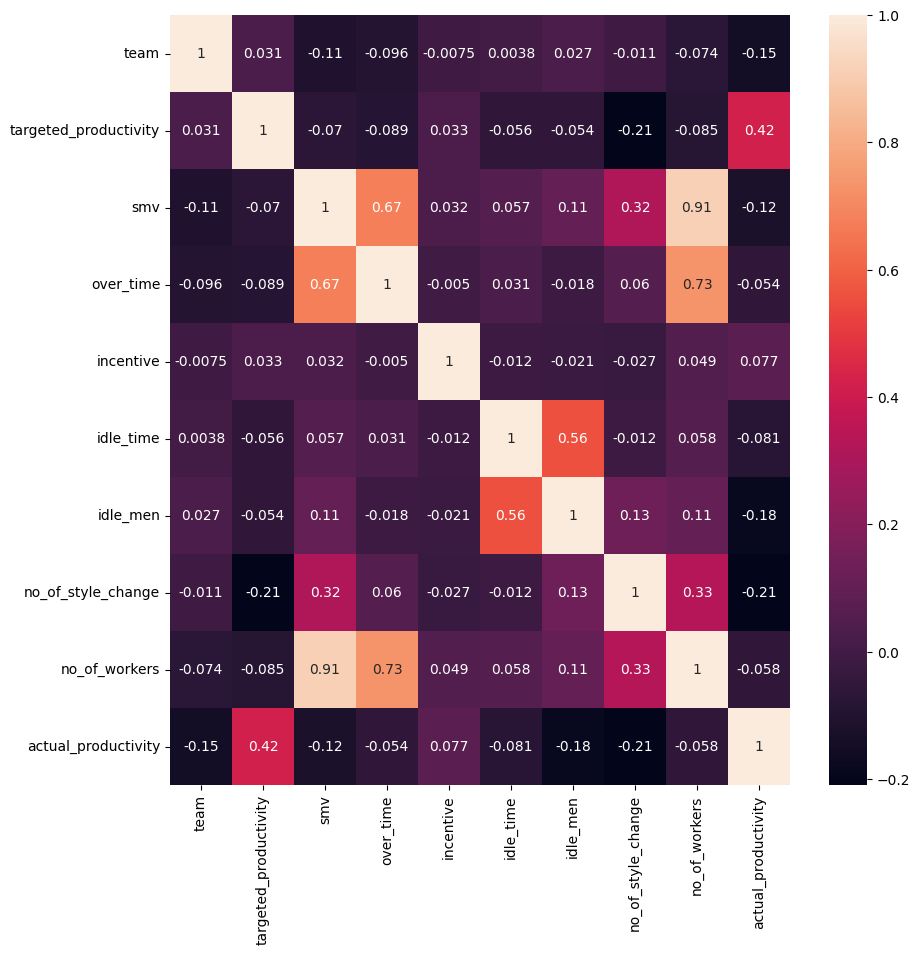

In [ ]:
# Grafico de correlación
plt.figure(figsize=(10,10))
sns.heatmap(df2.select_dtypes(exclude='object').corr(), annot=True)

<Figure size 1000x1000 with 0 Axes>

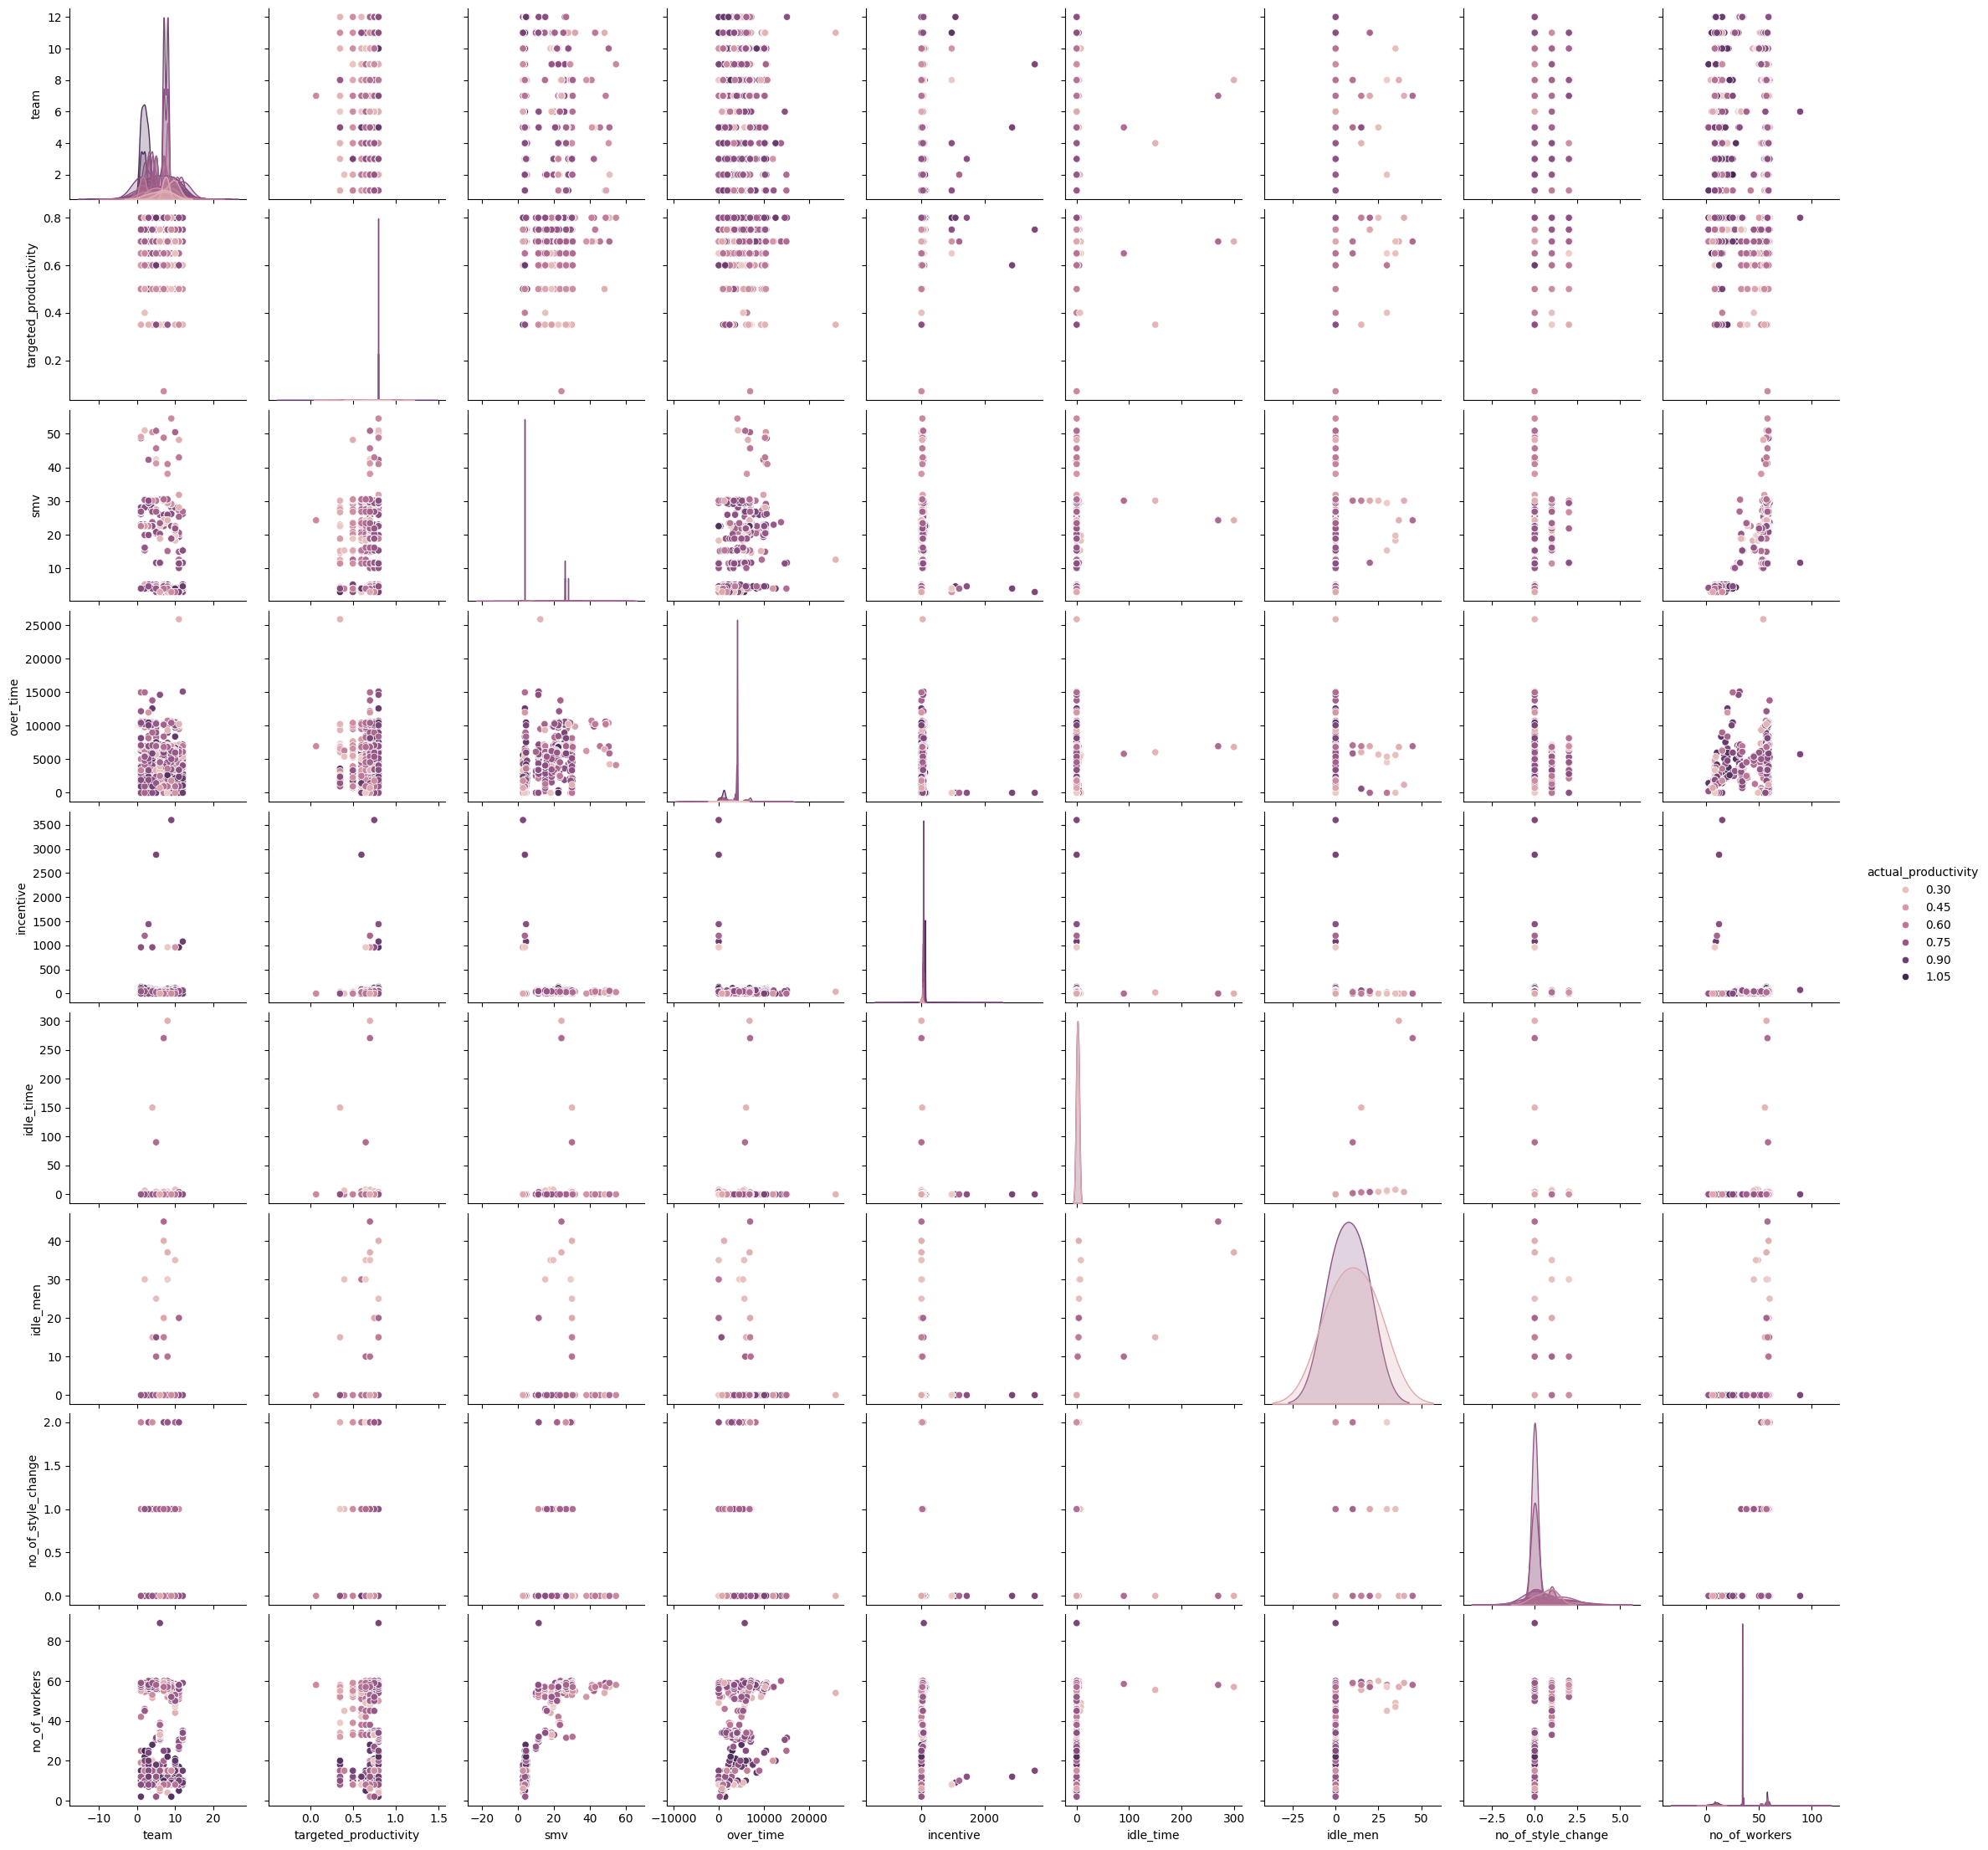

In [ ]:
# Variables numericas
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df2, hue='actual_productivity')
plt.show()

# Acción 1: Aplicación modelos lineales.

## Actividad 1: Evaluación de modelos
a. Cada estudiante debe seleccionar los modelos supervisados
regresión logística, KNN y árbol de decisión (solamente estos
modelos) resultantes de la implementación realizada en la fase 3 del
curso, socializar en el foro.

b. Cada estudiante debe diseñar la matriz de confusión, calcular las
métricas de evaluación (Precision, Recall, and Specificity) para cada
uno de los modelos, con los datos de prueba (hacerlo con el 30% de
los datos no entrenados) y socializar en el foro el archivo .ipynb del
código en Python.


# Aprendizaje

### Train - Test split

In [ ]:
#Para la regresión lineal se definene las X (no_of_workers )
# y las etiquetas (y) que será dada por los over_time.
X = df2 [['no_of_workers','over_time']]
y = df2 ['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split( df2.drop('actual_productivity', axis = 'columns'), df2['actual_productivity'], test_size=0.3, random_state=343)

#Se imprimen los resultados del entrenamiento y prueba.
print("Forma de X_train", X_train.shape)
print("Forma de X_test", X_test.shape)
print("Forma de y_train", X_train.shape)
print("Forma de y_test", y_test.shape)


Forma de X_train (837, 12)
Forma de X_test (359, 12)
Forma de y_train (837, 12)
Forma de y_test (359,)


### Preprocesamiento

In [ ]:
categorical_columns = ['quarter','department','day']

numerical_columns = ['team','targeted_productivity','smv',
                     'over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers']

In [ ]:
prep = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns),
                   ('scaler', StandardScaler(), numerical_columns)],
                  remainder= 'drop')

### Estrategia de Validacion - Croosvalidacion

In [ ]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=123)

In [ ]:
cv

RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123)

In [ ]:
print(X_train.columns)

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers'],
      dtype='object')


# Regresión logística

In [ ]:
reglog = Pipeline([('preproc', prep),
                  ('regLog', LogisticRegression( max_iter=500, penalty='none'))])

In [ ]:
y_train_discrete = (y_train > 0.5).astype(int)  # Discretize y_train
reglog.fit(X_train, y_train_discrete)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['quarter', 'department',
                                                   'day']),
                                                 ('scaler', StandardScaler(),
                                                  ['team',
                                                   'targeted_productivity',
                                                   'smv', 'over_time',
                                                   'incentive', 'idle_time',
                                                   'idle_men',
                                                   'no_of_style_change',
                                                   'no_of_workers'])])),
                ('regLog', LogisticRegression(max_iter=500, penalty='none'))])

In [ ]:
metrics.accuracy_score(y_train_discrete, reglog.predict(X_train))

0.7634408602150538

La matriz de confusión en Python
1. A nivel de columnas se muestra la predicción, a nivel de filas el valor Real.
2. Se empieza con Negativo, o sea es [N , P] en lugar de [P, N]

In [ ]:
confusion_matrix(y_train_discrete, reglog.predict(X_train))

array([[102, 154],
       [ 44, 537]])

In [ ]:
y_pred = (reglog.predict_proba(X_test)[:, 1] > 0.5).astype(int)

# Check if y_test is continuous and convert to binary if needed
if not np.issubdtype(y_test.dtype, np.integer):
    y_test = (y_test > 0.5).astype(int) # Assuming 0.5 is the threshold for discretization

# Calculate confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 29,  81],
       [ 15, 234]])

Text(0.5, 14.722222222222216, 'Valor Predicho')

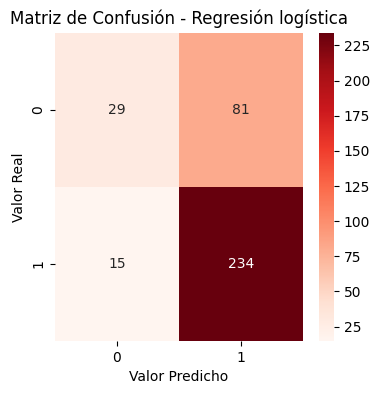

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión - Regresión logística')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train_discrete, reglog.predict(X_train)).ravel()
tp / (tp+fn) # sens

0.9242685025817556

La precisión es igual a verdaderos positivos sobre [verdaderos positivos + falsos positivos]
Precisión se entiende como "de lo que da el modelo (por clase), cuántas veces acierto"


Recall es igual a verdaderos positivos sobre [verdaderos positivos + falsos negativos]
Recall se entiende como "de lo real (por clase), cuántas veces lo detecto"

In [ ]:
print( classification_report(y_train_discrete, reglog.predict(X_train)) )

              precision    recall  f1-score   support

           0       0.70      0.40      0.51       256
           1       0.78      0.92      0.84       581

    accuracy                           0.76       837
   macro avg       0.74      0.66      0.68       837
weighted avg       0.75      0.76      0.74       837



In [ ]:
print( classification_report(y_test, reglog.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.66      0.26      0.38       110
           1       0.74      0.94      0.83       249

    accuracy                           0.73       359
   macro avg       0.70      0.60      0.60       359
weighted avg       0.72      0.73      0.69       359



# KNN


In [ ]:
KNN = Pipeline([('preproc', prep),
                  ('kNN', KNeighborsClassifier(n_neighbors=5))])

In [ ]:
KNN.fit(X_train, y_train_discrete)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['quarter', 'department',
                                                   'day']),
                                                 ('scaler', StandardScaler(),
                                                  ['team',
                                                   'targeted_productivity',
                                                   'smv', 'over_time',
                                                   'incentive', 'idle_time',
                                                   'idle_men',
                                                   'no_of_style_change',
                                                   'no_of_workers'])])),
                ('kNN', KNeighborsClassifier())])

In [ ]:
y_pred = KNN.predict(X_test)
cm = CM(y_test, y_pred)
cm

print(cm)

[[ 52  58]
 [ 27 222]]


Text(0.5, 14.722222222222216, 'Valor Predicho')

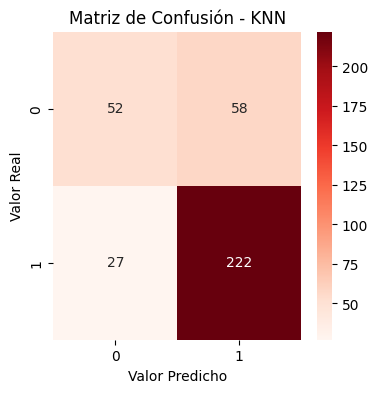

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión - KNN')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')

In [ ]:
metrics.accuracy_score(y_train_discrete, KNN.predict(X_train))
print( classification_report(y_train_discrete, KNN.predict(X_train)) )

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       256
           1       0.87      0.94      0.90       581

    accuracy                           0.86       837
   macro avg       0.85      0.80      0.82       837
weighted avg       0.85      0.86      0.85       837



In [ ]:
print( classification_report(y_test, KNN.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.66      0.47      0.55       110
           1       0.79      0.89      0.84       249

    accuracy                           0.76       359
   macro avg       0.73      0.68      0.69       359
weighted avg       0.75      0.76      0.75       359



In [ ]:
metrics.accuracy_score(y_train_discrete, KNN.predict(X_train))

0.8566308243727598

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train_discrete, KNN.predict(X_train)).ravel()
tp / (tp+fn) # sens

0.9397590361445783

# Árbol de decisión

In [ ]:
# Una buena practica para Reg.logística es que las variables objetivo sean numéricas,
#vamos a convertirlas (Alta productividad, Baja productividad) con la creación de la variable 'tipo_productividad'
df2['actual_productivity'] = df2['actual_productivity'].astype(float) # Convert the column to float type
df2['actual_productivity'] = df2['actual_productivity'].apply(lambda x: 1 if x > 0.7 else 0)

In [ ]:
#Se puede ver que en la mayoria de los casos hay una alta productividad.
df2['actual_productivity'].value_counts()

actual_productivity
1    830
0    366
Name: count, dtype: int64

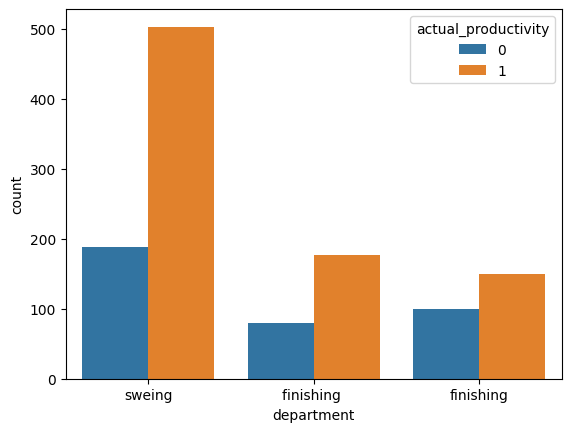

In [ ]:
sns.countplot(data=df2, x='department',hue='actual_productivity')
plt.show()

In [ ]:
df_data_processing = df2.copy()

In [ ]:
df2.head(5)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,1


In [ ]:
categorical_columns = ['quarter','department','day']

numerical_columns = ['team','targeted_productivity','smv',
                     'over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers']


X = df2[['no_of_workers', 'over_time']]
y = df2['actual_productivity']

In [ ]:
# entrenamiento distribuido 70% entrenamiento y 30% pruebas.

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)



X_train, X_test, y_train, y_test = train_test_split( df2.drop('actual_productivity', axis = 'columns'), df2['actual_productivity'], test_size=0.3, random_state=42,stratify=y)

#Se imprimen los resultados del entrenamiento y prueba.
print("Forma de X_train", X_train.shape)
print("Forma de X_test", X_test.shape)
print("Forma de y_train", X_train.shape)
print("Forma de y_test", y_test.shape)

Forma de X_train (837, 12)
Forma de X_test (359, 12)
Forma de y_train (837, 12)
Forma de y_test (359,)


In [ ]:
categorical_columns = [col for col in categorical_columns if col != 'actual_productivity']

prep = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns),
                   ('scaler', StandardScaler(), numerical_columns)],
                  remainder= 'drop')
# Update the pipeline with the modified 'prep'
arbol_pipe = Pipeline([('preproc', prep),
                       ('arbol', tree.DecisionTreeClassifier(max_depth= 3,criterion= 'gini',
                                                             class_weight= 'balanced', random_state=42))])



In [ ]:
arbol_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'arbol', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__verbose_feature_names_out', 'preproc__encoder', 'preproc__scaler', 'preproc__encoder__categories', 'preproc__encoder__drop', 'preproc__encoder__dtype', 'preproc__encoder__feature_name_combiner', 'preproc__encoder__handle_unknown', 'preproc__encoder__max_categories', 'preproc__encoder__min_frequency', 'preproc__encoder__sparse', 'preproc__encoder__sparse_output', 'preproc__scaler__copy', 'preproc__scaler__with_mean', 'preproc__scaler__with_std', 'arbol__ccp_alpha', 'arbol__class_weight', 'arbol__criterion', 'arbol__max_depth', 'arbol__max_features', 'arbol__max_leaf_nodes', 'arbol__min_impurity_decrease', 'arbol__min_samples_leaf', 'arbol__min_samples_split', 'arbol__min_weight_fraction_leaf', 'arbol__random_state', 'arbol__splitter'])

In [ ]:
arbol_grid = dict(
  arbol__min_samples_split = [500, 900],
  arbol__ccp_alpha = [0.01, 0.001, 0.0001] )

In [ ]:
print(set(categorical_columns) - set(X_train.columns))
print(set(numerical_columns) - set(X_train.columns))


set()
set()


In [ ]:

# Re-run the GridSearchCV
arbol_tuned = GridSearchCV(arbol_pipe, arbol_grid, cv=cv, n_jobs=-1, error_score='raise')
arbol_tuned.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123),
             error_score='raise',
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['quarter',
                                                                          'department',
                                                                          'day']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['team',
                                                                          'targeted_productivity',
                                                                          'smv',
                                                                          'over_time',
                                                                          'incentive',
                                                                          'idle_time',
                                                                          'idle_men',
                                                                          'no_of_style_change',
                                                                          'no_of_workers'])])),
                                       ('arbol',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               max_depth=3,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'arbol__ccp_alpha': [0.01, 0.001, 0.0001],
                         'arbol__min_samples_split': [500, 900]})

In [ ]:
arbol_tuned.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123),
             error_score='raise',
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['quarter',
                                                                          'department',
                                                                          'day']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['team',
                                                                          'targeted_productivity',
                                                                          'smv',
                                                                          'over_time',
                                                                          'incentive',
                                                                          'idle_time',
                                                                          'idle_men',
                                                                          'no_of_style_change',
                                                                          'no_of_workers'])])),
                                       ('arbol',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               max_depth=3,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'arbol__ccp_alpha': [0.01, 0.001, 0.0001],
                         'arbol__min_samples_split': [500, 900]})

In [ ]:
arbol_tuned.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['quarter', 'department',
                                                   'day']),
                                                 ('scaler', StandardScaler(),
                                                  ['team',
                                                   'targeted_productivity',
                                                   'smv', 'over_time',
                                                   'incentive', 'idle_time',
                                                   'idle_men',
                                                   'no_of_style_change',
                                                   'no_of_workers'])])),
                ('arbol',
                 DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced',
                                        max_depth=3, min_samples_split=500,
                                        random_state=42))])

In [ ]:
y_pred = arbol_tuned.predict(X_test)

In [ ]:
cm = CM(y_test, y_pred)
cm

print(cm)

[[103   7]
 [107 142]]


In [ ]:
y_pred=arbol_tuned.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

Text(0.5, 14.722222222222216, 'Valor Predicho')

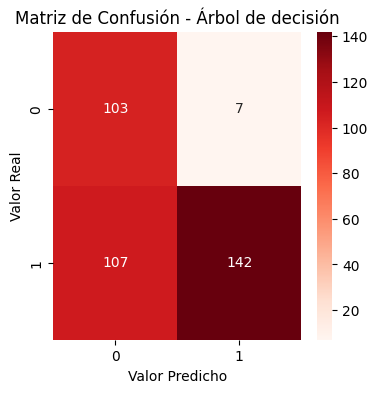

In [ ]:
# Asumiendo que ya tienes y_test y y_pred
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión - Árbol de decisión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')

In [ ]:
metrics.accuracy_score(y_train_discrete, arbol_tuned.predict(X_train))
print( classification_report(y_train_discrete, arbol_tuned.predict(X_train)) )

              precision    recall  f1-score   support

           0       0.46      0.94      0.62       256
           1       0.95      0.51      0.66       581

    accuracy                           0.64       837
   macro avg       0.70      0.72      0.64       837
weighted avg       0.80      0.64      0.65       837



In [ ]:
print( classification_report(y_test, arbol_tuned.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.49      0.94      0.64       110
           1       0.95      0.57      0.71       249

    accuracy                           0.68       359
   macro avg       0.72      0.75      0.68       359
weighted avg       0.81      0.68      0.69       359



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, arbol_tuned.predict(X_train)).ravel()
tp / (tp+fn) # sens

0.5111876075731497

In [ ]:
metrics.accuracy_score(y_train, arbol_tuned.predict(X_train))

0.6415770609318996

### Ahora se va a graficar el árbol resultante

In [ ]:
arbol_tuned.best_estimator_.__class__

sklearn.pipeline.Pipeline

In [ ]:
## Podemos acceder al modelo final usando los selectores best_estimator_ y named_steps
arbol_tuned.best_estimator_.named_steps['arbol'].__class__

sklearn.tree._classes.DecisionTreeClassifier

[Text(0.6, 0.8333333333333334, 'x[18] <= -0.008\ngini = 0.5\nsamples = 837\nvalue = [418.5, 418.5]'),
 Text(0.4, 0.5, 'x[22] <= -0.023\ngini = 0.451\nsamples = 524\nvalue = [392.344, 204.568]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.497\nsamples = 371\nvalue = [204.346, 177.196]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.222\nsamples = 153\nvalue = [187.998, 27.372]'),
 Text(0.8, 0.5, 'gini = 0.194\nsamples = 313\nvalue = [26.156, 213.932]')]

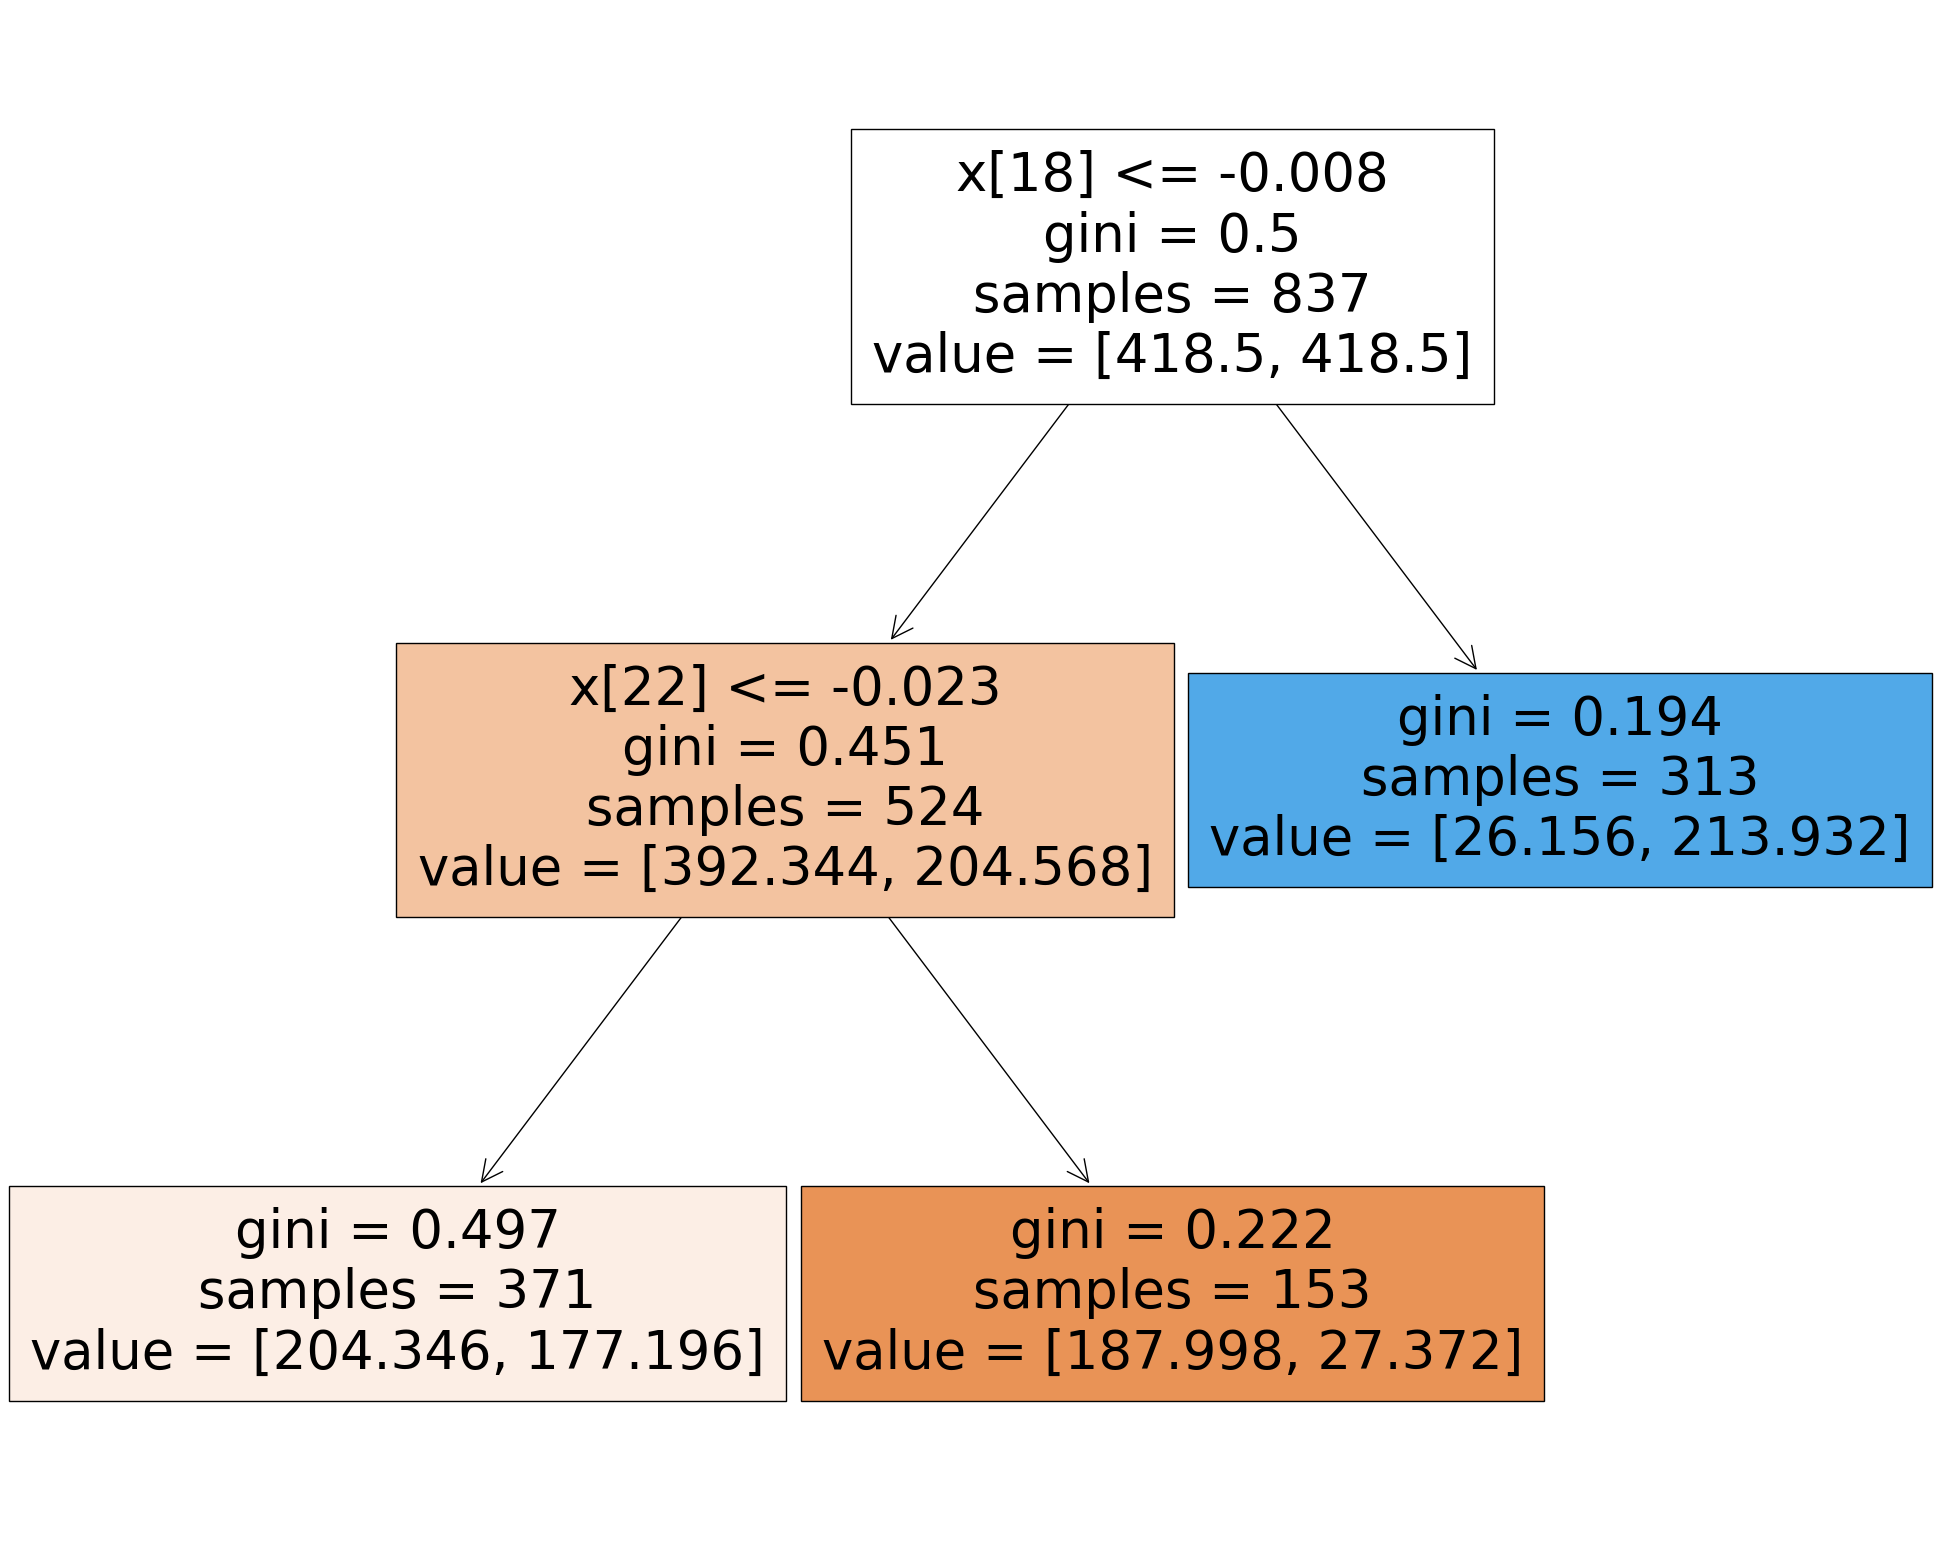

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree( arbol_tuned.best_estimator_.named_steps['arbol'], filled= True)

### En la anterior gráfica se puede ver los resultados, pero no los nombres del Dataframe así que se hará lo siguente para que en la gráfica se puede ver:

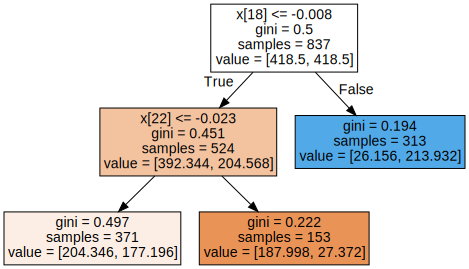

In [ ]:
# DOT data
dot_data = tree.export_graphviz( arbol_tuned.best_estimator_.named_steps['arbol'], filled= True)
# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
X_train.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers'],
      dtype='object')

In [ ]:
arbol_pipe.named_steps['preproc'].fit_transform(X_train)

array([[ 0.        ,  1.        ,  0.        , ..., -0.12617225,
         2.04382506,  0.99355373],
       [ 0.        ,  1.        ,  0.        , ..., -0.12617225,
        -0.34873658, -0.99480825],
       [ 0.        ,  0.        ,  1.        , ..., -0.12617225,
        -0.34873658, -1.12885513],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.12617225,
        -0.34873658, -1.17353742],
       [ 1.        ,  0.        ,  0.        , ..., -0.12617225,
        -0.34873658,  1.03823602],
       [ 1.        ,  0.        ,  0.        , ..., -0.12617225,
        -0.34873658, -1.17353742]])

In [ ]:
arbol_pipe.named_steps['preproc'].named_transformers_['encoder'].get_feature_names_out(  categorical_columns)

array(['quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'], dtype=object)

In [ ]:
labels= np.concatenate( [ prep.named_transformers_['encoder'].get_feature_names_out(categorical_columns) ,
                       numerical_columns ] )
labels

array(['quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers'], dtype=object)

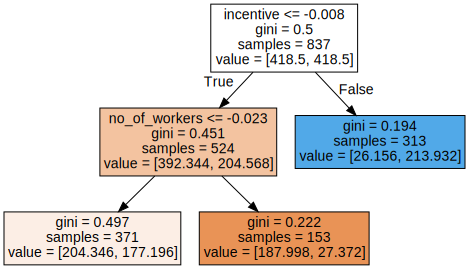

In [ ]:
# DOT data
dot_data = tree.export_graphviz(arbol_tuned.best_estimator_.named_steps['arbol'],
                                feature_names= labels,
                                filled= True)
# graph
graph = graphviz.Source(dot_data, format="png")
graph

# Referencias Usadas.
Brett Lantz. (2019). *Machine Learning with R: Expert Techniques for
Predictive Modeling, 3rd Edition: Vol. Third edition*. Packt
Publishing. (pp. 313-345).

George Kyriakides, & Konstantinos G. Margaritis. (2019). *Hands-On
Ensemble Learning with Python: Build Highly Optimized
Ensemble Machine Learning Models Using Scikit-learn and Keras*.
Packt Publishing. (pp. 15-20).

Giuseppe Bonaccorso. (2018). *Machine Learning Algorithms: Popular
Algorithms for Data Science and Machine Learning, 2nd Edition:
Vol. 2nd ed*. Packt Publishing. (pp. 168-185).

Kane, F. (2017). *Hands-On Data Science and Python Machine Learning.
Packt Publishing*. (pp. 181-183).

Kane, F. (2017). *Hands-On Data Science and Python Machine
Learning. Packt Publishing*. (pp. 183-195).

Raschka, S., & Mirjalili, V. (2017). *Python Machine Learning - Second Edition: Vol.2nd ed. Packt Publishing*. (pp. 90-103)

Camargo,I. (4 de julio de 2024). *Web Conferencia - Unidad 1 - Fase 3*. UNAD. https://url.unad.edu.co/FuAtg


Camargo,I. (11 de julio de 2024). *CIPAS del curso Machine Learning*. UNAD.  https://url.unad.edu.co/vPEMC

Camargo,I. (1 de agosto de 2024). *Web conferencia - Fase 5 - Prueba Objetiva Abierta (POA)*. UNAD.  https://url.unad.edu.co/eXOTN

